In [1]:
import numpy as np
import pandas as pd
import keras
import cv2
from matplotlib import pyplot as plt
import os
import random
from PIL import Image

In [2]:
#samples = 20000
df= pd.read_csv(r"C:\Users\DIVYANSHI\Downloads\train.csv")
base_path="C:\\Users\\DIVYANSHI\\Downloads\\images_000"

In [3]:
df

,id,url,landmark_id
0,6e158a47eb2ca3f6,https://upload.wikimedia.org/wikipedia/commons...,142820
1,202cd79556f30760,http://upload.wikimedia.org/wikipedia/commons/...,104169
2,3ad87684c99c06e1,http://upload.wikimedia.org/wikipedia/commons/...,37914
3,e7f70e9c61e66af3,https://upload.wikimedia.org/wikipedia/commons...,102140
4,4072182eddd0100e,https://upload.wikimedia.org/wikipedia/commons...,2474
...,...,...,...
4132909,fc0f007893b11ba7,https://upload.wikimedia.org/wikipedia/commons...,172138
4132910,39aad18585867916,https://upload.wikimedia.org/wikipedia/commons...,162860
4132911,fd0725460e4ebbec,https://upload.wikimedia.org/wikipedia/commons...,191243
4132912,73691ae29e24ba19,https://upload.wikimedia.org/wikipedia/commons...,145760


In [67]:
samples=20000
df=df.loc[df["id"].str.startswith('00',na=False), :]
num_classes=len(df["landmark_id"].unique())
num_data=len(df)

In [68]:
num_classes

13589

In [6]:
num_data


16157

In [7]:
data=pd.DataFrame(df["landmark_id"].value_counts())
data.reset_index(inplace=True)
data.columns=['landmark_id','index']
data.head()

,landmark_id,index
0,138982,47
1,62798,18
2,83144,14
3,171772,13
4,176528,12


In [8]:
data.tail

<bound method NDFrame.tail of        landmark_id  index
0           138982     47
1            62798     18
2            83144     14
3           171772     13
4           176528     12
...            ...    ...
13584        54986      1
13585       182355      1
13586        25204      1
13587       100559      1
13588        63972      1

[13589 rows x 2 columns]>

In [9]:
data.columns=['landmark_id','index']

In [10]:
data['index'].describe()

count    13589.000000
mean         1.188976
std          0.727458
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         47.000000
Name: index, dtype: float64

(array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.1789e+04, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.3960e+03, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        2.5400e+02, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 7.6000e+01,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 3.4000e+01, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 2.0000e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        9.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 3.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

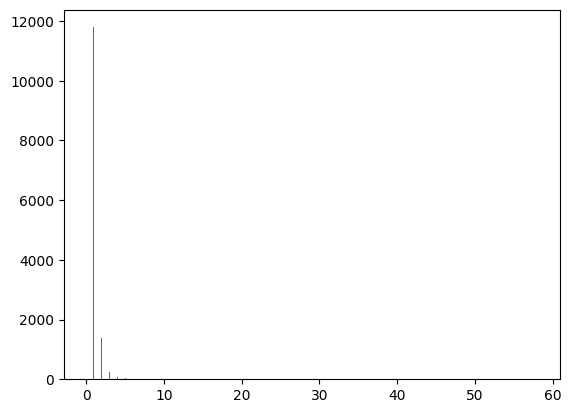

In [11]:
plt.hist(data['index'],500,range=(0,58),label="test")

In [12]:
data['index'].between(0,5).sum()

13549

In [14]:
data['index'].between(5,10).sum()

69

(array([1., 2., 1., ..., 1., 1., 5.]),
 array([0.00000e+00, 2.70000e+01, 3.00000e+01, ..., 2.03062e+05,
        2.03071e+05, 2.03073e+05]),
 <BarContainer object of 13588 artists>)

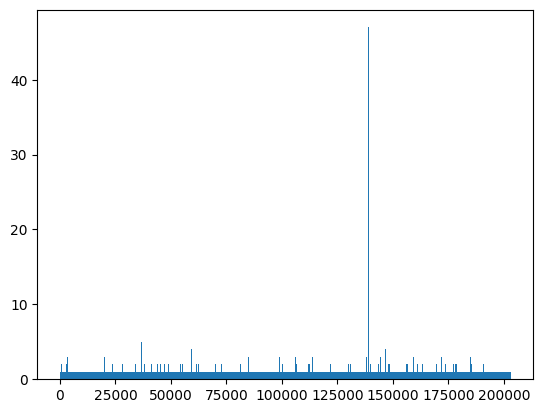

In [15]:
plt.hist(df['landmark_id'], bins=np.sort(df['landmark_id'].unique()))


In [16]:
#training of model
from sklearn.preprocessing import LabelEncoder
lencoder=LabelEncoder()
lencoder.fit(df['landmark_id'])

LabelEncoder()

In [17]:
df.head()

,id,url,landmark_id
108,0036d78c05c194d9,https://upload.wikimedia.org/wikipedia/commons...,50089
172,00c08b162f34f53f,https://upload.wikimedia.org/wikipedia/commons...,163404
710,00e5d77c905d94a6,https://upload.wikimedia.org/wikipedia/commons...,26066
1256,00c8dba0df4d112a,https://upload.wikimedia.org/wikipedia/commons...,35744
1262,001cd787f1e9a803,https://upload.wikimedia.org/wikipedia/commons...,61937


In [18]:
def encode_label(lbl):
    return lencoder.transform(lbl)

In [19]:
def decode_label(lbl):
    return lencoder.inverse_transform(lbl)

In [56]:
def get_image_from_number(num,df):
    fname, label = df.iloc[num,:]
    fname=fname + '.jpg'
    f1=fname[0]
    f2=fname[1]
    f3=fname[2]
    path=os.path.join(f1,f2,f3,fname)
    im=cv2.imread(os.path.join(base_path,path))
    return im, label

4 Sample images from random classes


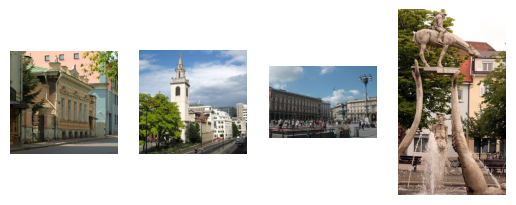

In [43]:
print("4 Sample images from random classes")
fig=plt.figure(figure=(16,16))
for i in range(1,5):
    ri=random.choices(os.listdir(base_path),k=3)
    folder= base_path+'/'+ri[0]+'/'+ri[1]+'/'+ri[2]
    random_img=random.choice(os.listdir(folder))
    img=np.array(Image.open(folder+'/'+random_img))
    fig.add_subplot(1,4,i)
    plt.imshow(img)
    plt.axis('off')
plt.show()

In [44]:
from keras.applications.vgg19 import VGG19
from keras.layers import *
from keras import Sequential
import tensorflow as tf
tf.compat.v1.disable_eager_execution()

In [45]:
learning_rate= 0.0001
decay_speed= 1e-6
momentum = 0.09
loss_function ="sparse_categorical_crossentropy"
source_model = VGG19(weights= None)
drop_layer= Dropout(0.5)
drop_layer2= Dropout(0.5)

In [46]:
model=Sequential()
for layer in source_model.layers[:-1]:
    if layer== source_model.layers[-25]:
        model.add(BatchNormalization())
    model.add(layer)
model.add(Dense(num_classes,activation = "softmax"))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ batch_normalization_1                │ (None, 224, 224, 3)         │              12 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,8

 Total params: 195,244,385 (744.80 MB)

 Trainable params: 195,244,379 (744.80 MB)

 Non-trainable params: 6 (24.00 B)

In [47]:
from tensorflow.keras.optimizers import RMSprop

optim1 = RMSprop(learning_rate=learning_rate)
model.compile(optimizer=optim1, loss=loss_function, metrics=["accuracy"])



In [48]:
def image_reshape(im, target_size):
    return cv2.resize(im,target_size)

In [49]:
def get_batch(dataframe, start, batch_size):
    image_array=[]
    label_array=[]
    end_img = start+batch_size
    if(end_img)>len(dataframe):
        end_img=len(dataframe)

    for idx in range(start,end_img):
        n=idx
        im, label = get_image_from_number(n,dataframe)
        im=image_reshape(im,(244,244))/255.0
        image_array.append(im)
        label_array.append(label)
    label_array=encode_label(label_array)
    return np.array(image_array),np.array(label_array)

    

In [50]:
batch_size=16
epoch_shuffle = True
weight_classes = True
epochs =1
train, val = np.split(df.sample(frac=1), [int(0.8*len(df))])


print(len(train))
print(len(val))

12925
3232
